In [24]:
# Packages
import pickle
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, load_model


In [74]:
# Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [6]:
# Autoencoder model class
weight_decay = 1e-4
kernel_regularizer = regularizers.l2(weight_decay)

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(50, kernel_initializer="glorot_uniform", activation="relu", kernel_regularizer=kernel_regularizer),
      layers.Dense(latent_dim, kernel_initializer="glorot_uniform", activation="relu", kernel_regularizer=kernel_regularizer),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, kernel_initializer="glorot_uniform", activation="sigmoid", kernel_regularizer=kernel_regularizer),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [13]:
# Model definition (Autoencoder #1)
autoencoder = Autoencoder(2)

# Model compilation
autoencoder.compile(optimizer="adam", loss=losses.MeanSquaredError())

# Model fit
epochs = 800
batch_size = 128

'''history = autoencoder.fit(
    x=x_train,
    y=x_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, x_test),
)'''

# autoencoder.save("autoencoder")
autoencoder = load_model("autoencoder1")

'''with open("network1/assets/history", "wb") as file_pi:
    pickle.dump(history.history, file_pi)'''


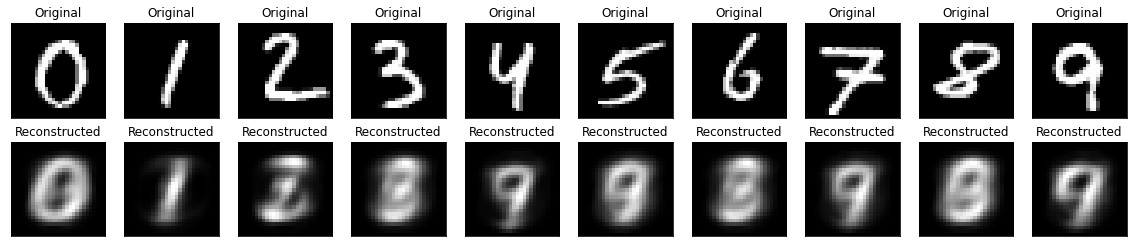

In [187]:
# Montage (Autoencoder #1)

# Encode and decode images
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

# Plot sample of reconstructed digits
numbers = [13, 5, 1, 32, 42, 52, 50, 64, 61, 99]

n = len(numbers)
plt.figure(figsize=(2 * n, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[numbers[i]])
  plt.title("Original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[numbers[i]])
  plt.title("Reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

# plt.savefig('reconstruction.png', bbox_inches='tight')
plt.show()


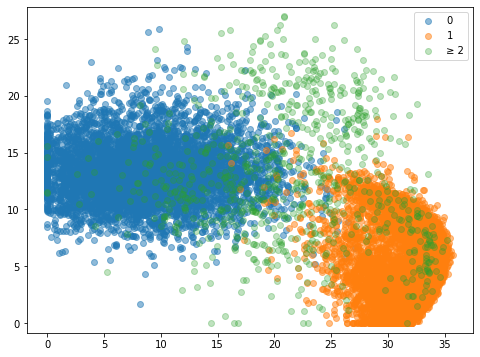

In [95]:
# Scatterplot (Autoencoder #1)

# Encoded digits
x_train_encoded = autoencoder.encoder.predict(x_train, batch_size=batch_size)
x_subset = autoencoder.encoder.predict(x_test[:1000], batch_size=batch_size)
y_subset = y_train[:1000]

plt.figure(figsize=(8, 6))
plt.axes().set_aspect('equal', adjustable='datalim')
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Digits reproduced WELL
legends = []
for index in range(0, 2):
    plt.scatter(x_train_encoded[y_train == index, 0], x_train_encoded[y_train == index, 1], c=colors[index], alpha=0.5)
    legends.append(str(index))

# Digits reprouced POORLY
for index in range(2, 10):
    plt.scatter(x_subset[y_subset == index, 0], x_subset[y_subset == index, 1], c=colors[-1], alpha=0.3)
legends.append("≥ 2")

plt.legend(legends)
# plt.savefig('scatterplot.png', bbox_inches='tight')
plt.show()

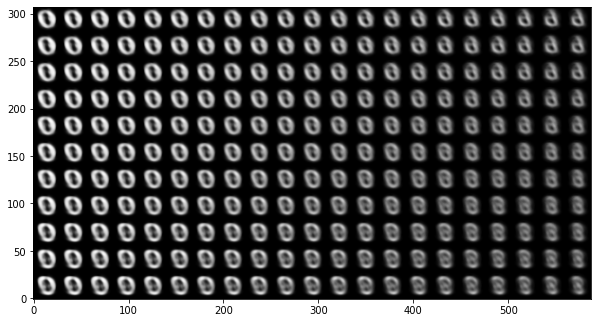

In [191]:
# Test rule (Autoencoder #1)

# Parameters
m_points = 21 # 11
n_points = 11 # 16
n_pixels = 28

figure = np.zeros((n_pixels * n_points, n_pixels * m_points))
grid_x = np.linspace(0, 20, m_points)
# grid_x = np.linspace(25, 35, m_points)
grid_y = np.linspace(10, 20, n_points)
# grid_y = np.linspace(0, 15, n_points)
for i, xi in enumerate(grid_x):
    for j, yi in enumerate(grid_y):
        encoded = np.array([[xi, yi]])
        decoded = autoencoder.decoder.predict(encoded)
        image = decoded[0].reshape(n_pixels, n_pixels)
        figure[j * n_pixels: (j + 1) * n_pixels,
               i * n_pixels: (i + 1) * n_pixels] = image

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.gca().invert_yaxis()
plt.show()

In [97]:
# Model definition (Autoencoder #2)
autoencoder2 = Autoencoder(4)

# Model compilation
autoencoder2.compile(optimizer="adam", loss=losses.MeanSquaredError())

# Model fit
epochs = 800
batch_size = 128

'''history = autoencoder2.fit(
    x=x_train,
    y=x_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, x_test),
)'''

autoencoder2 = load_model("autoencoder2")

'''with open("network2/assets/history", "wb") as file_pi:
    pickle.dump(history.history, file_pi)'''


'with open("network2/assets/history", "wb") as file_pi:\n    pickle.dump(history.history, file_pi)'

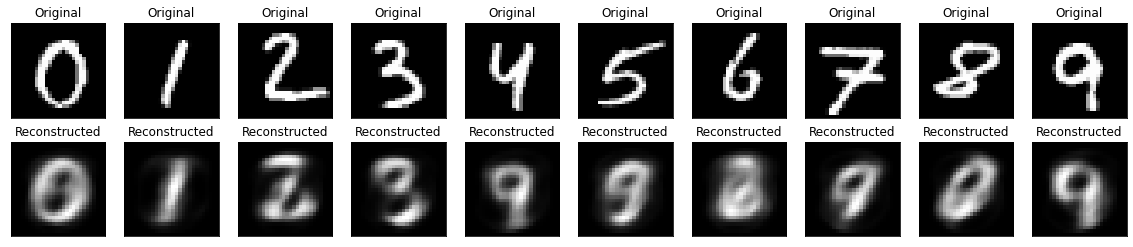

In [189]:
# Montage (Autoencoder #2)

# Encode and decode images
encoded_imgs = autoencoder2.encoder(x_test).numpy()
decoded_imgs = autoencoder2.decoder(encoded_imgs).numpy()

# Plot sample of reconstructed digits
numbers = [13, 5, 1, 32, 42, 52, 50, 64, 61, 99]

n = len(numbers)
plt.figure(figsize=(2 * n, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[numbers[i]])
  plt.title("Original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[numbers[i]])
  plt.title("Reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

# plt.savefig('reconstruction2.png', bbox_inches='tight')
plt.show()


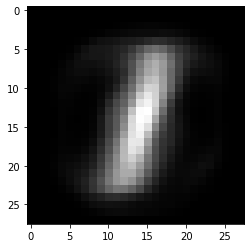

In [218]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(encoded_imgs[y_test > 1])
# sns.pairplot(df)
# plt.show()

zero = [25, 5, 10, 10]
one = [2, 25, 15, 20]
encoded = np.array([one])
decoded = autoencoder2.decoder.predict(encoded)
plt.imshow(decoded[0,:,:])
plt.savefig('one.png', bbox_inches='tight')
